In [276]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [277]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [278]:
data.columns = [data.columns[i].lower().replace(' ', '_') for i in range(len(data.columns)) ]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [279]:
data = data.drop(['customer'], axis=1)
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [280]:
data['effective_to_date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [281]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [282]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### 1. Open the categoricals variable we created before.

In [283]:
categoricals = data.select_dtypes('object')
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### 2. Plot all the categorical variables with the proper plot. What can you see?

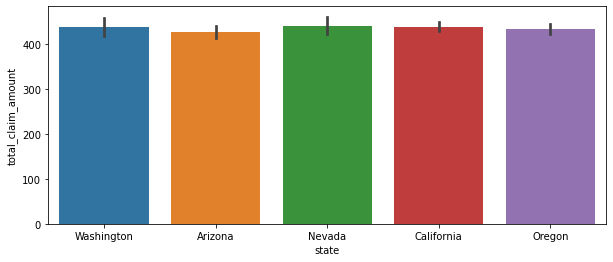

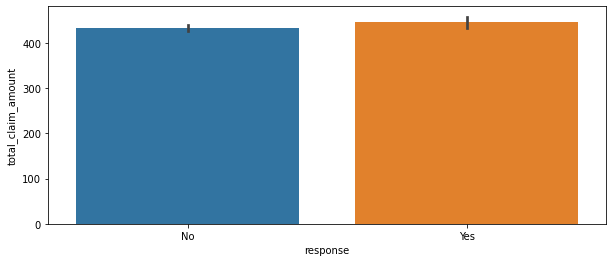

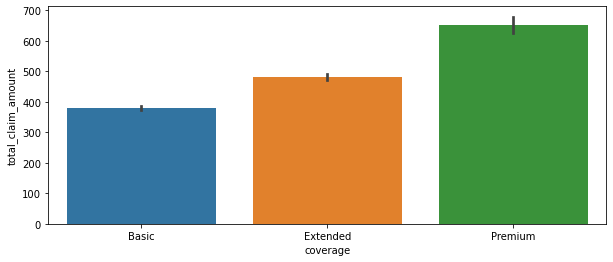

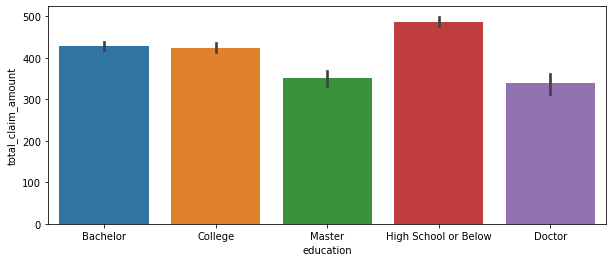

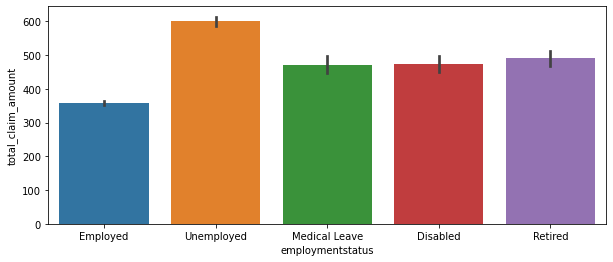

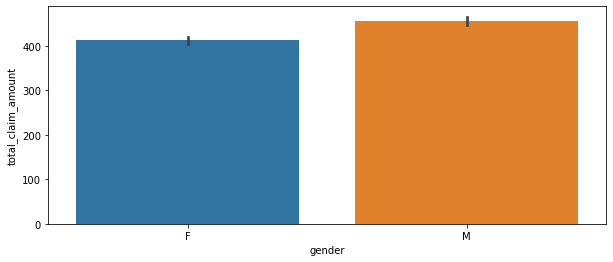

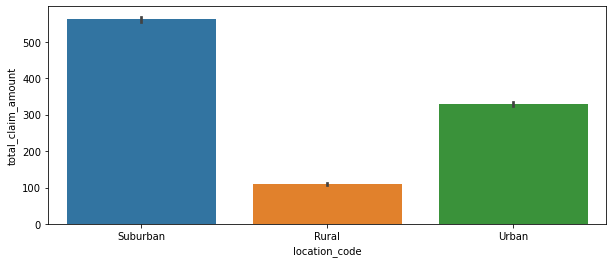

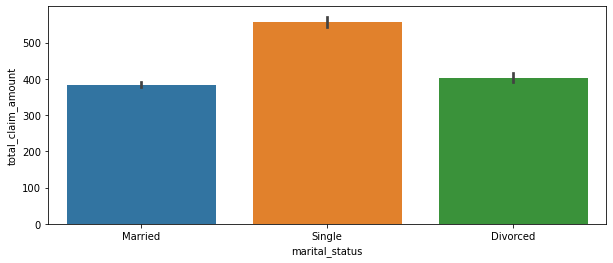

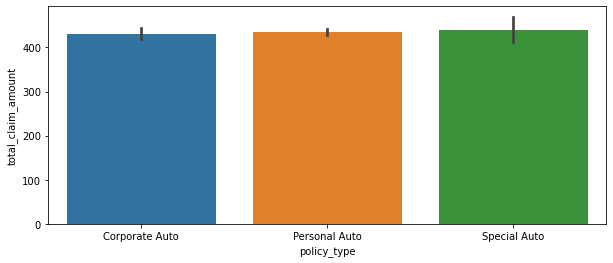

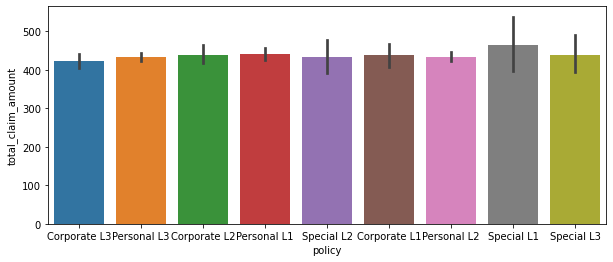

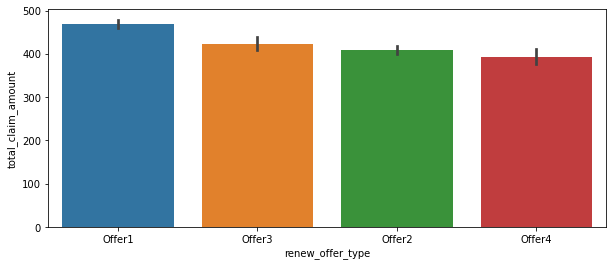

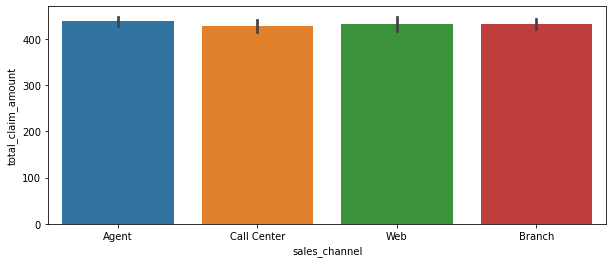

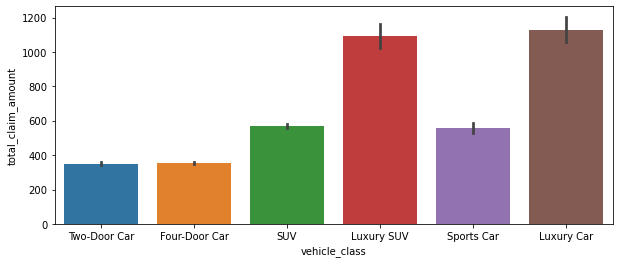

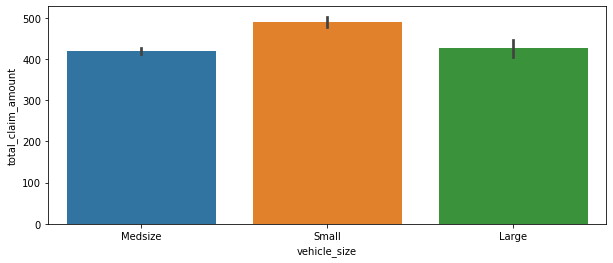

In [284]:
for column in categoricals.columns:
    plt.figure(figsize=(10,4))
    sns.barplot(x=column, y="total_claim_amount", data=data)
    plt.show()

#### My comment: as we can see in the plots above, my analysis is as follows:
1. coverage plot ---> basic caveraging will result in less total_claim_amount and premium coveraging will result in more tatal_claim_amount.
2. education plot ---> people with high school or below have highest total_claim_amount and doctors have lowest total_claim_amount.
3. employmentstatus plot ---> employed people have lowes total_claim_amount while unemployed people have highest total_claim_amount.
4. location_code plot ---> people who lives in rural areas have lowes total_claim_amount as opposited to suburban areas.
5. marital_status plot ---> singles have highest total_claim_amount.
6. renew_offer_type plot ---> renew offer type 1s have highest total_claim_amount.
7. vehicle_class plot ---> people who own luxury suv and luxury car have highest total_claim_amount while people who own two or four-door cars have lowest total_claim_amount.

#### 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [285]:
for column in categoricals.columns:
    print(data[column].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [286]:
categoricals["coverage"] = categoricals["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}).astype(int)

In [287]:
categoricals["vehicle_size"] = categoricals["vehicle_size"].map({"Small" : 1, "Medsize" : 2, "Large" : 3}).astype(int)

In [288]:
categoricals["location_code"] = categoricals["location_code"].map({"Rural" : 1, "Suburban" : 2, "Urban" : 3}).astype(int)

In [289]:
categoricals['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [290]:
categoricals['employmentstatus'] = categoricals['employmentstatus'].apply(lambda x: x if x in ['Employed', 'Unemployed'] else 'Other')

categoricals['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

In [291]:
categoricals["employmentstatus"] = categoricals["employmentstatus"].map({"Other" : 0, "Unemployed" : 1, "Employed" : 2}).astype(int)

In [292]:
categoricals_new = categoricals.select_dtypes('object')
categoricals_new.head()

,state,response,education,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,Bachelor,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,Bachelor,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,Bachelor,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Bachelor,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Bachelor,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


#### My comment: I had too many categories in the 'employmentstatus' column which represented little amount so I bucketed several of them into one. Plus I could encode the 'coverage', 'vehicle_size' ,and 'location_code' columns because these columns were ordinal type and could convert to numerical variables.

In [305]:
data_crosstab1 = pd.crosstab(categoricals_new['education'], categoricals_new['marital_status'], margins=True)
data_crosstab1

marital_status,Divorced,Married,Single,All
education,,,,
Bachelor,456,1550,742,2748
College,394,1550,737,2681
Doctor,60,238,44,342
High School or Below,317,1489,816,2622
Master,142,471,128,741
All,1369,5298,2467,9134


In [306]:
from scipy.stats import chi2_contingency

stats, p_value, dof, frequencies = chi2_contingency(data_crosstab1)
p_value

8.60830558013726e-17

In [307]:
data_crosstab2 = pd.crosstab(categoricals_new['renew_offer_type'], categoricals_new['sales_channel'], margins=True)
data_crosstab2

sales_channel,Agent,Branch,Call Center,Web,All
renew_offer_type,,,,,
Offer1,1690,1099,588,375,3752
Offer2,978,788,647,513,2926
Offer3,518,394,291,229,1432
Offer4,291,286,239,208,1024
All,3477,2567,1765,1325,9134


In [308]:
stats, p_value, dof, frequencies = chi2_contingency(data_crosstab2)
p_value

1.187207219148588e-41

#### My comment: there are p_value below 0.05 between 'education' and 'marital_status' and also between 'renew_offer_type' and 'sales_channel'. It means I can dropp one of them without decreasing the metrics of the model.

In [309]:
categoricals_new = categoricals_new.drop(['education', 'renew_offer_type'], axis=1)
categoricals_new

,state,response,gender,marital_status,policy_type,policy,sales_channel,vehicle_class
0,Washington,No,F,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car
1,Arizona,No,F,Single,Personal Auto,Personal L3,Agent,Four-Door Car
2,Nevada,No,F,Married,Personal Auto,Personal L3,Agent,Two-Door Car
3,California,No,M,Married,Corporate Auto,Corporate L2,Call Center,SUV
4,Washington,No,M,Single,Personal Auto,Personal L1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...
9129,California,No,M,Married,Personal Auto,Personal L1,Web,Four-Door Car
9130,California,Yes,F,Divorced,Corporate Auto,Corporate L3,Branch,Four-Door Car
9131,California,No,M,Single,Corporate Auto,Corporate L2,Branch,Four-Door Car
9132,California,No,M,Married,Personal Auto,Personal L2,Branch,Four-Door Car


#### 4. Plot time variable. Can you extract something from it?